In [ ]:
pip install opencv-python

In [ ]:
pip install tensorflow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Image 2023-09-02 at 09.23.53.jpg to WhatsApp Image 2023-09-02 at 09.23.53.jpg


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.3191 - sparse_categorical_accuracy: 0.9083
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1275 - sparse_categorical_accuracy: 0.9623
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0875 - sparse_categorical_accuracy: 0.9743
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0666 - sparse_categorical_accuracy: 0.9801
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0969 - sparse_categorical_accuracy: 0.9694
Test Accuracy: 0.9693999886512756
Test Loss: 0.09690885990858078


Saving WhatsApp Image 2023-09-02 at 09.23.53.jpg to WhatsApp Image 2023-09-02 at 09.23.53.jpg
1/1 [==============================] - 0s 88ms/step


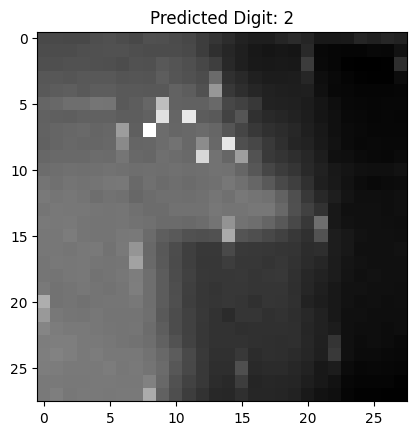

In [ ]:
import pandas as pd
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tensorflow.keras.metrics import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from google.colab import files

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

# Compile the model with SparseCategoricalAccuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

# Load and process the uploaded image
uploaded = files.upload()
for filename in uploaded.keys():
    img_content = uploaded[filename]
    img = cv.imdecode(np.frombuffer(img_content, np.uint8), cv.IMREAD_GRAYSCALE)

    # Resize the image to (28, 28)
    img = cv.resize(img, (28, 28))

    # Normalize the image
    img = img.astype('float32') / 255.0

    # Reshape the image for the model
    img = np.expand_dims(img, axis=0)

    # Predict the digit in the image
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    # Display the result
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.show()